In [2]:
# To load and work with the data
import pandas as pd
import numpy as np
import os
from datetime import datetime

# To visualize the data
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
df2 = pd.read_csv('complete_dataset.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [4]:
df2

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [5]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2105 non-null   float64       
 11  rainfall         2103 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

In [6]:
df3 = df2.set_index('date')
df3

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N


In [7]:
fig = px.line(df2, x='date', y='demand', title='Energy Demand')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
#             Here we are giving 1Y, 3Y and 5Y window so we can visualize it in a better way
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [8]:
print(f"Rows : {df2.shape[0]}")
print(f"Columns : {df2.shape[1]}")
print(f"\nFeatures : {df2.columns.tolist()}")
print(f"\nMissing Values : \n{df2.isnull().any()}")
print(f"\nUnique Values : \n{df2.nunique()}")

Rows : 2106
Columns : 14

Features : ['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday']

Missing Values : 
date               False
demand             False
RRP                False
demand_pos_RRP     False
RRP_positive       False
demand_neg_RRP     False
RRP_negative       False
frac_at_neg_RRP    False
min_temperature    False
max_temperature    False
solar_exposure      True
rainfall            True
school_day         False
holiday            False
dtype: bool

Unique Values : 
date               2106
demand             2106
RRP                2106
demand_pos_RRP     2106
RRP_positive       2106
demand_neg_RRP      192
RRP_negative        179
frac_at_neg_RRP      21
min_temperature     211
max_temperature     283
solar_exposure      316
rainfall            105
school_day            2
holiday               2
dtype: int64


In [9]:
df2['solar_exposure'] = df2['solar_exposure'].fillna(method = 'ffill')
df2['rainfall'] = df2['rainfall'].fillna(method = 'ffill')

In [10]:
print(f"\nMissing Values : \n{df2.isnull().any()}")


Missing Values : 
date               False
demand             False
RRP                False
demand_pos_RRP     False
RRP_positive       False
demand_neg_RRP     False
RRP_negative       False
frac_at_neg_RRP    False
min_temperature    False
max_temperature    False
solar_exposure     False
rainfall           False
school_day         False
holiday            False
dtype: bool


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

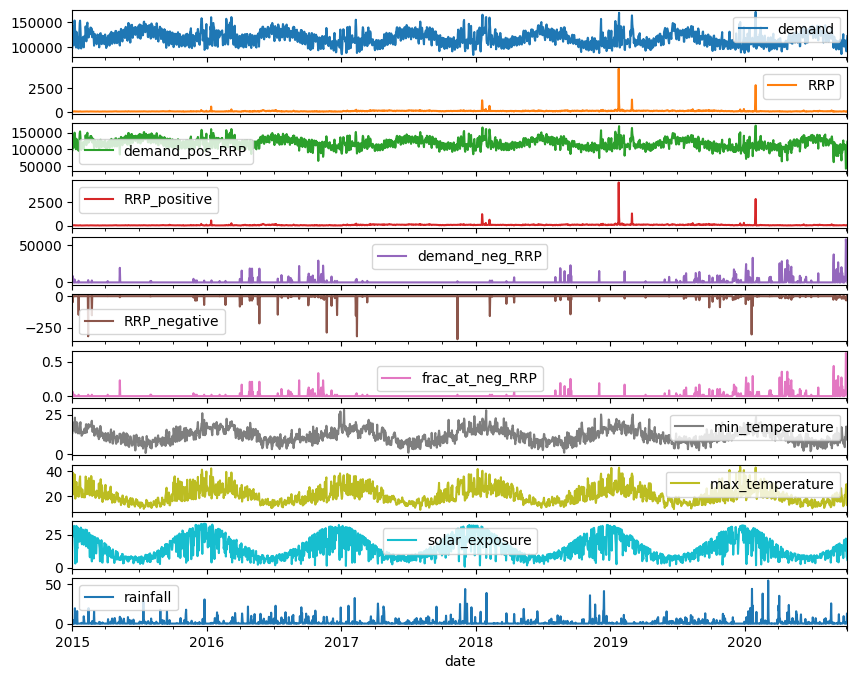

In [11]:
df3 = df2.set_index('date')
df3.plot(subplots = True)

In [12]:
df3.resample('M').mean()

<ipython-input-12-bc7d5891af77>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
date,,,,,,,,,,,
2015-01-31,120576.860323,27.001545,120024.903065,27.379333,551.957258,-6.593864,0.004032,15.887097,25.851613,23.003226,1.529032
2015-02-28,128754.107679,29.141102,128552.316964,29.541121,201.790714,-16.805714,0.001488,16.739286,26.371429,20.050000,1.350000
2015-03-31,117730.704839,26.411552,117730.704839,26.411552,0.000000,0.000000,0.000000,13.112903,22.722581,16.470968,0.741935
2015-04-30,119606.603500,29.742708,119547.809333,29.753864,58.794167,-0.037333,0.000694,10.563333,19.236667,11.066667,1.226667
2015-05-31,125072.101935,30.999966,124386.360806,31.176826,685.741129,-0.364521,0.008065,9.803226,17.132258,7.545161,1.212903
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,129347.331333,51.709460,128401.759500,51.978910,945.571833,-0.600279,0.010417,7.153333,14.850000,7.573333,0.966667
2020-07-31,132352.096613,65.949480,131958.691452,66.087631,393.405161,-0.147248,0.004032,7.061290,13.980645,7.854839,0.967742
2020-08-31,123475.707903,56.271075,121459.322258,57.261158,2016.385645,-1.461596,0.024194,7.590323,15.148387,10.558065,1.987097


<ipython-input-12-60ac037bbb5a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

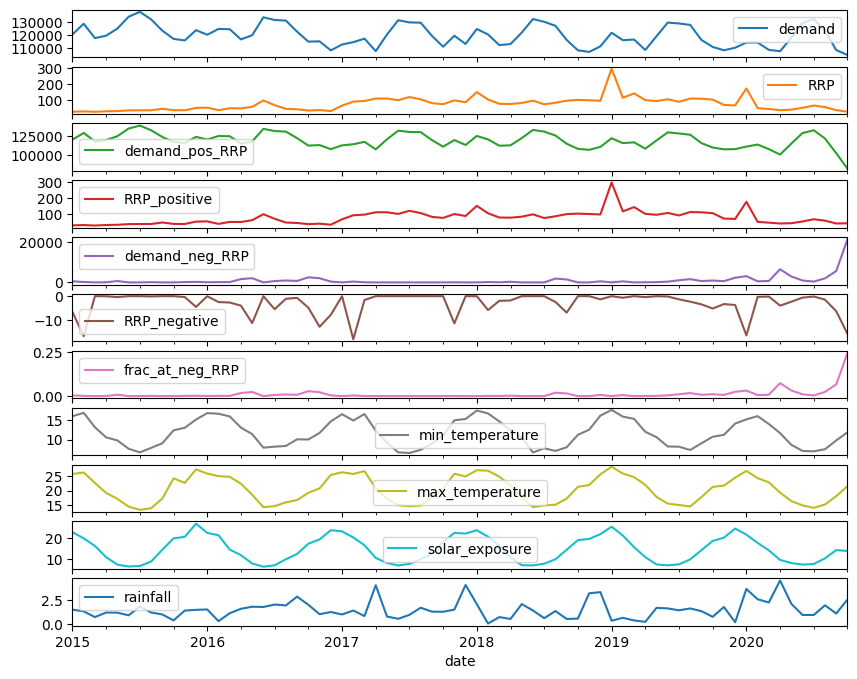

In [ ]:
df3.resample('M').mean().plot(subplots = True)

In [13]:
df_monthly = df3.resample('M').mean()
df_monthly

<ipython-input-13-59a61fad81de>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
date,,,,,,,,,,,
2015-01-31,120576.860323,27.001545,120024.903065,27.379333,551.957258,-6.593864,0.004032,15.887097,25.851613,23.003226,1.529032
2015-02-28,128754.107679,29.141102,128552.316964,29.541121,201.790714,-16.805714,0.001488,16.739286,26.371429,20.050000,1.350000
2015-03-31,117730.704839,26.411552,117730.704839,26.411552,0.000000,0.000000,0.000000,13.112903,22.722581,16.470968,0.741935
2015-04-30,119606.603500,29.742708,119547.809333,29.753864,58.794167,-0.037333,0.000694,10.563333,19.236667,11.066667,1.226667
2015-05-31,125072.101935,30.999966,124386.360806,31.176826,685.741129,-0.364521,0.008065,9.803226,17.132258,7.545161,1.212903
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,129347.331333,51.709460,128401.759500,51.978910,945.571833,-0.600279,0.010417,7.153333,14.850000,7.573333,0.966667
2020-07-31,132352.096613,65.949480,131958.691452,66.087631,393.405161,-0.147248,0.004032,7.061290,13.980645,7.854839,0.967742
2020-08-31,123475.707903,56.271075,121459.322258,57.261158,2016.385645,-1.461596,0.024194,7.590323,15.148387,10.558065,1.987097


In [14]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.5 MB/s eta 0:00:00


In [15]:
#df_monthly.drop('demand_pos_RRP', inplace = True, axis = 1)
df_monthly.drop('RRP_negative', inplace = True, axis = 1)
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2015-01-31 to 2020-10-31
Freq: M
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           70 non-null     float64
 1   RRP              70 non-null     float64
 2   demand_pos_RRP   70 non-null     float64
 3   RRP_positive     70 non-null     float64
 4   demand_neg_RRP   70 non-null     float64
 5   frac_at_neg_RRP  70 non-null     float64
 6   min_temperature  70 non-null     float64
 7   max_temperature  70 non-null     float64
 8   solar_exposure   70 non-null     float64
 9   rainfall         70 non-null     float64
dtypes: float64(10)
memory usage: 6.0 KB


In [16]:
%%time
# conda install -c conda-forge pmdarima
import pmdarima as pm
# Auto Arima performs Grid Search CV Test
model = pm.auto_arima(df_monthly['demand'], 
#                       Monthly basis
                      m = 12,
#                       Data is Seasonal
                      seasonal = True,
#                       P, Q starting value
                      start_p = 0,
                      start_q = 0,
                      max_order = 4,
#                       Tests seasonality and gives I or D value
                      test = 'adf',
                      error_action = 'ignore',
                      suppress_warnings = True,
#                       Performs random search
                      stepwise = True,
                      trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1146.452, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1145.202, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1143.643, Time=0.65 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1147.972, Time=0.46 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1140.039, Time=1.57 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1145.729, Time=0.44 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1140.846, Time=3.46 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1140.946, Time=1.71 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1138.948, Time=0.78 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1138.090, Time=0.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1142.911, Time=0.21 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1140.084, Time=0.80 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1138.836, Time=0.85 sec
 ARIMA(1,1,1)(0,1,2)[12]

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   70
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -566.045
Date:                                 Sat, 29 Apr 2023   AIC                           1138.090
Time:                                         03:21:09   BIC                           1144.219
Sample:                                     01-31-2015   HQIC                          1140.472
                                          - 10-31-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.2499      0.109     -2.286      0.022      -0.464      -0.036
ma.S.L24      -0.1110      0.070     -1.590      0.112      -0.248       0.026
sigma2      2.964e+07   8.47e-10    3.5e+16      0.000    2.96e+07    2.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   7.39   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.01   Prob(JB):                         0.95
Heteroskedasticity (H):               0.54   Skew:                             0.10
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+33. Standard errors may be unstable.
"""

In [ ]:
df_monthly

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
date,,,,,,,,,,
2015-01-31,120576.860323,27.001545,120024.903065,27.379333,551.957258,0.004032,15.887097,25.851613,23.003226,1.529032
2015-02-28,128754.107679,29.141102,128552.316964,29.541121,201.790714,0.001488,16.739286,26.371429,20.050000,1.350000
2015-03-31,117730.704839,26.411552,117730.704839,26.411552,0.000000,0.000000,13.112903,22.722581,16.470968,0.741935
2015-04-30,119606.603500,29.742708,119547.809333,29.753864,58.794167,0.000694,10.563333,19.236667,11.066667,1.226667
2015-05-31,125072.101935,30.999966,124386.360806,31.176826,685.741129,0.008065,9.803226,17.132258,7.545161,1.212903
...,...,...,...,...,...,...,...,...,...,...
2020-06-30,129347.331333,51.709460,128401.759500,51.978910,945.571833,0.010417,7.153333,14.850000,7.573333,0.966667
2020-07-31,132352.096613,65.949480,131958.691452,66.087631,393.405161,0.004032,7.061290,13.980645,7.854839,0.967742
2020-08-31,123475.707903,56.271075,121459.322258,57.261158,2016.385645,0.024194,7.590323,15.148387,10.558065,1.987097


In [18]:
train = df_monthly[(df_monthly.index.get_level_values(0) >= '2015-01-31') & 
                      (df_monthly.index.get_level_values(0) < '2020-06-30')]

test = df_monthly[(df_monthly.index.get_level_values(0) >= '2020-06-30')]

In [19]:
test

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
date,,,,,,,,,,
2020-06-30,129347.331333,51.709460,128401.759500,51.978910,945.571833,0.010417,7.153333,14.850000,7.573333,0.966667
2020-07-31,132352.096613,65.949480,131958.691452,66.087631,393.405161,0.004032,7.061290,13.980645,7.854839,0.967742
2020-08-31,123475.707903,56.271075,121459.322258,57.261158,2016.385645,0.024194,7.590323,15.148387,10.558065,1.987097
2020-09-30,108515.397500,36.857896,102823.907333,39.431121,5691.490167,0.067361,9.793333,18.076667,14.453333,1.120000
2020-10-31,104800.634167,27.356591,83207.881667,40.504804,21592.752500,0.246528,11.850000,21.616667,14.083333,2.600000


In [20]:
model.fit(train['demand'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [21]:
forecast = model.predict(n_periods = 5, return_conf_int = True)
forecast

(2020-06-30    128430.408543
 2020-07-31    127585.898673
 2020-08-31    126373.477608
 2020-09-30    115348.114890
 2020-10-31    109469.801783
 Freq: M, dtype: float64,
 array([[117561.76684533, 139299.05024139],
        [112215.31817867, 142956.47916653],
        [107548.43797783, 145198.51723834],
        [ 93610.83149346, 137085.39828559],
        [ 85166.7801231 , 133772.82344287]]))

In [22]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns = ['prediction'])
forecast_df

,prediction
date,
2020-06-30,128430.408543
2020-07-31,127585.898673
2020-08-31,126373.477608
2020-09-30,115348.114890
2020-10-31,109469.801783


<Axes: xlabel='date'>

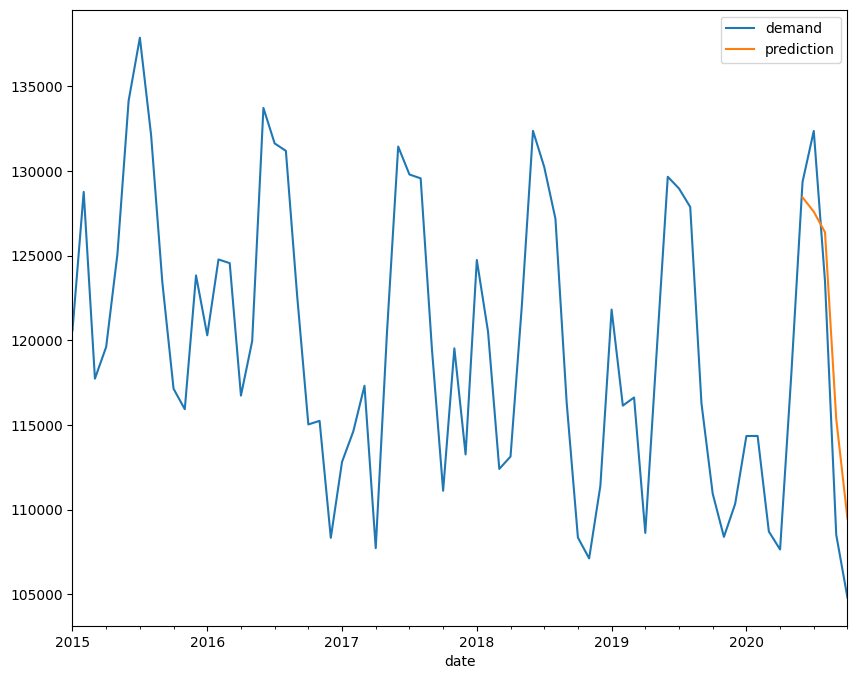

In [23]:
pd.concat([df_monthly['demand'], forecast_df], axis = 1).plot()

In [26]:
forecast1 = model.predict(n_periods = 15, return_conf_int = True)
forecast1

(2020-06-30    128430.408543
 2020-07-31    127585.898673
 2020-08-31    126373.477608
 2020-09-30    115348.114890
 2020-10-31    109469.801783
 2020-11-30    108319.849840
 2020-12-31    109377.503616
 2021-01-31    115550.539577
 2021-02-28    114920.143905
 2021-03-31    109883.317584
 2021-04-30    108078.453978
 2021-05-31    118088.941054
 2021-06-30    128528.699318
 2021-07-31    127559.002848
 2021-08-31    126179.768386
 Freq: M, dtype: float64,
 array([[117561.76684533, 139299.05024139],
        [112215.31817867, 142956.47916653],
        [107548.43797783, 145198.51723834],
        [ 93610.83149346, 137085.39828559],
        [ 85166.7801231 , 133772.82344287],
        [ 81697.22348263, 134942.47619726],
        [ 80621.78059437, 138133.22663849],
        [ 84809.49218435, 146291.58697039],
        [ 82314.43831374, 147525.84949555],
        [ 75513.96962152, 144252.66554577],
        [ 72031.6493814 , 144125.25857396],
        [ 80439.34392685, 155738.53818185],
        [ 8

In [27]:
forecast_range = pd.date_range(start = '2020-06-30', periods = 15, freq = 'M')

In [28]:
forecast1_df = pd.DataFrame(forecast1[0], index = forecast_range, columns = ['prediction'])
forecast1_df

,prediction
2020-06-30,128430.408543
2020-07-31,127585.898673
2020-08-31,126373.477608
2020-09-30,115348.114890
2020-10-31,109469.801783
2020-11-30,108319.849840
2020-12-31,109377.503616
2021-01-31,115550.539577
2021-02-28,114920.143905
2021-03-31,109883.317584


<Axes: >

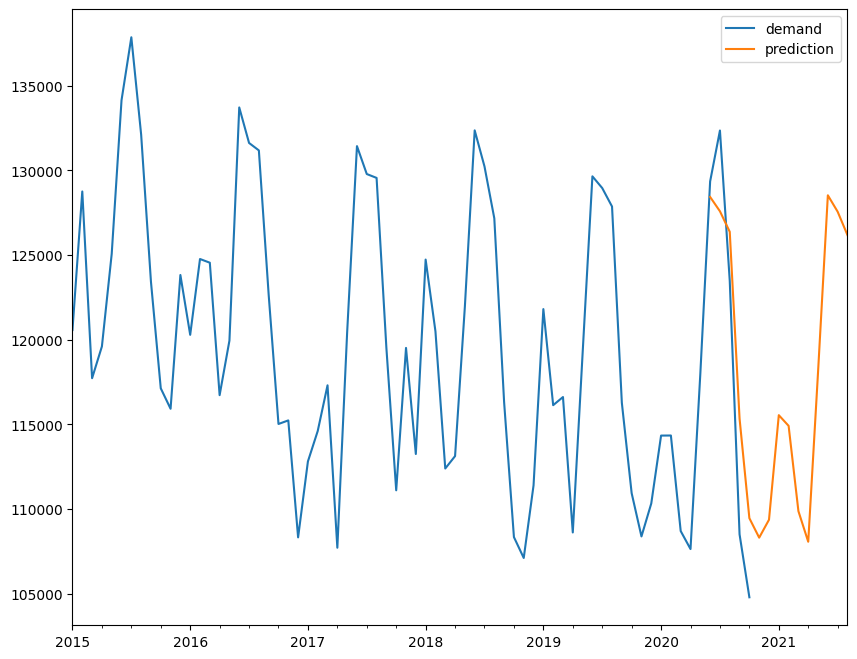

In [29]:
pd.concat([df_monthly['demand'], forecast1_df], axis=1).plot()

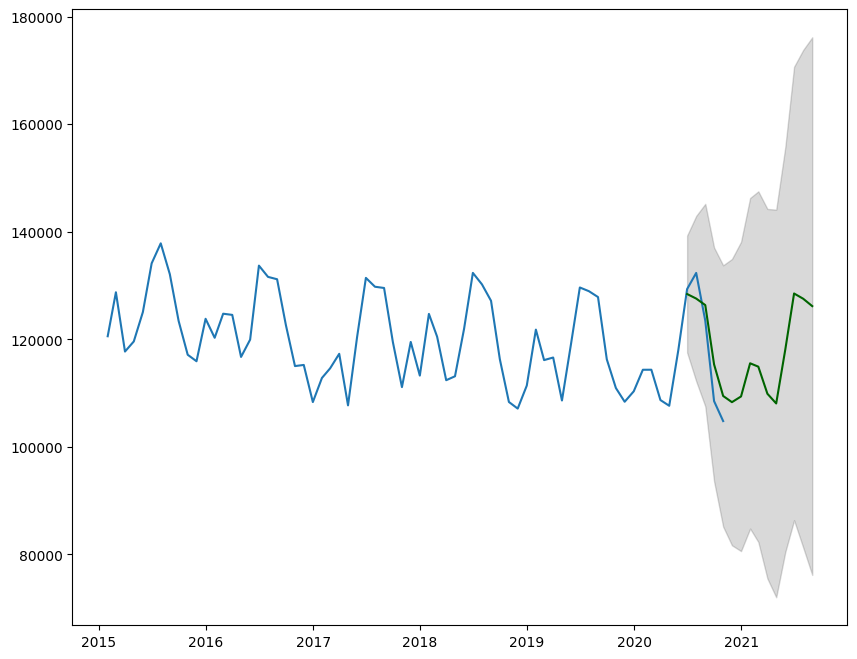

In [30]:
lower = pd.Series(forecast1[1][:, 0], index = forecast_range)
upper = pd.Series(forecast1[1][:, 1], index = forecast_range)
plt.plot(df_monthly['demand'])
plt.plot(forecast1_df, color = 'darkgreen')
plt.fill_between(forecast_range, 
                 lower,
                 upper,
                 color = 'k',
                 alpha = .15)

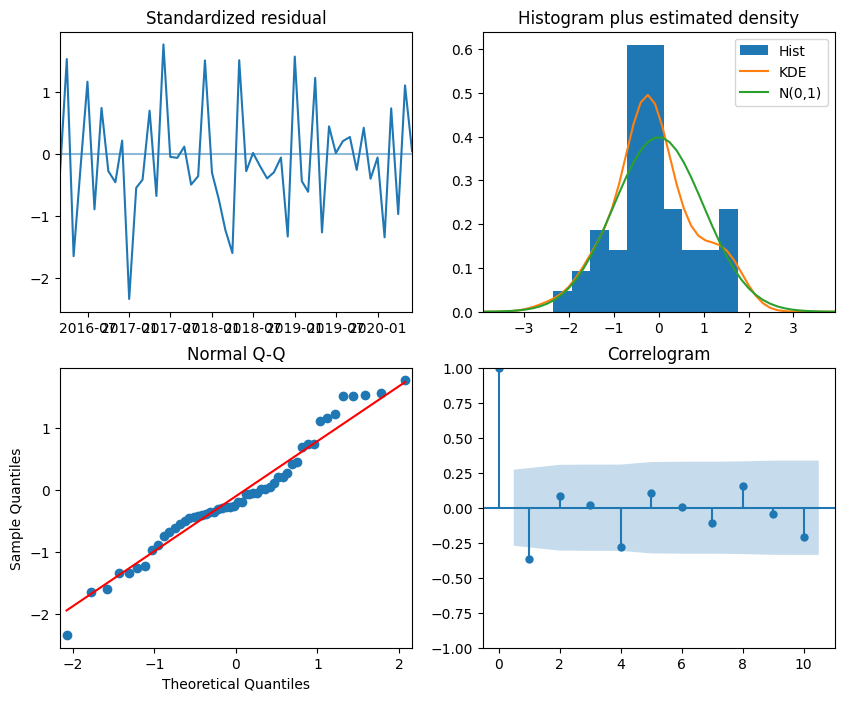

In [31]:
out = model.plot_diagnostics()

In [32]:
df_corr = df2[['demand', 'max_temperature', 'min_temperature', 'solar_exposure', 'rainfall', 'RRP', 'school_day', 'holiday']]

In [33]:
df_corr.corr()

<ipython-input-33-47e931222a64>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,demand,max_temperature,min_temperature,solar_exposure,rainfall,RRP
demand,1.000000,-0.073216,-0.156118,-0.257471,-0.064662,0.217538
max_temperature,-0.073216,1.000000,0.705433,0.598929,-0.154980,0.165484
min_temperature,-0.156118,0.705433,1.000000,0.376205,-0.002938,0.070619
solar_exposure,-0.257471,0.598929,0.376205,1.000000,-0.123249,0.061815
rainfall,-0.064662,-0.154980,-0.002938,-0.123249,1.000000,-0.028615
RRP,0.217538,0.165484,0.070619,0.061815,-0.028615,1.000000


In [34]:
df2.corr()

<ipython-input-34-e0c6714eb3b3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
demand,1.000000,0.217538,0.971377,0.215038,-0.180638,0.057854,-0.189839,-0.156118,-0.073216,-0.257471,-0.064662
RRP,0.217538,1.000000,0.220856,0.999821,-0.078815,0.038931,-0.077955,0.070619,0.165484,0.061815,-0.028615
demand_pos_RRP,0.971377,0.220856,1.000000,0.214628,-0.409102,0.120054,-0.416573,-0.147020,-0.068146,-0.229813,-0.069770
RRP_positive,0.215038,0.999821,0.214628,1.000000,-0.062631,0.029455,-0.061968,0.071052,0.165663,0.061317,-0.027832
demand_neg_RRP,-0.180638,-0.078815,-0.409102,-0.062631,1.000000,-0.274847,0.995590,0.009030,0.000914,-0.037495,0.040491
RRP_negative,0.057854,0.038931,0.120054,0.029455,-0.274847,1.000000,-0.258065,-0.077248,-0.033255,0.001672,-0.020861
frac_at_neg_RRP,-0.189839,-0.077955,-0.416573,-0.061968,0.995590,-0.258065,1.000000,0.008859,-0.001174,-0.036728,0.038629
min_temperature,-0.156118,0.070619,-0.147020,0.071052,0.009030,-0.077248,0.008859,1.000000,0.705433,0.376205,-0.002938
max_temperature,-0.073216,0.165484,-0.068146,0.165663,0.000914,-0.033255,-0.001174,0.705433,1.000000,0.598929,-0.154980
solar_exposure,-0.257471,0.061815,-0.229813,0.061317,-0.037495,0.001672,-0.036728,0.376205,0.598929,1.000000,-0.123249


In [35]:
import seaborn as sns

<ipython-input-36-28890f610699>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

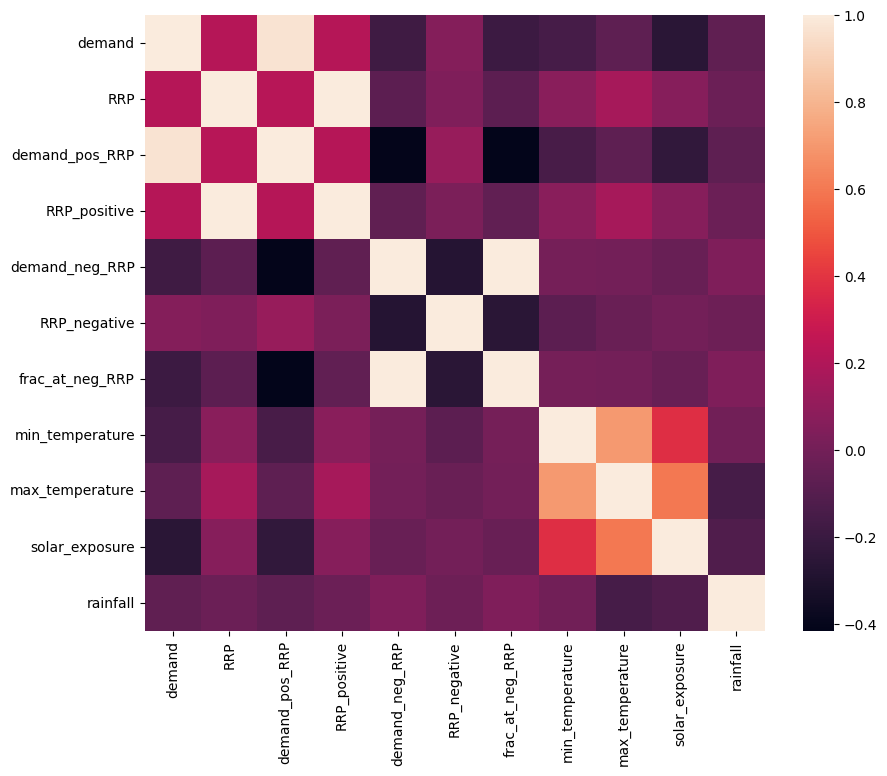

In [36]:
sns.heatmap(df2.corr())

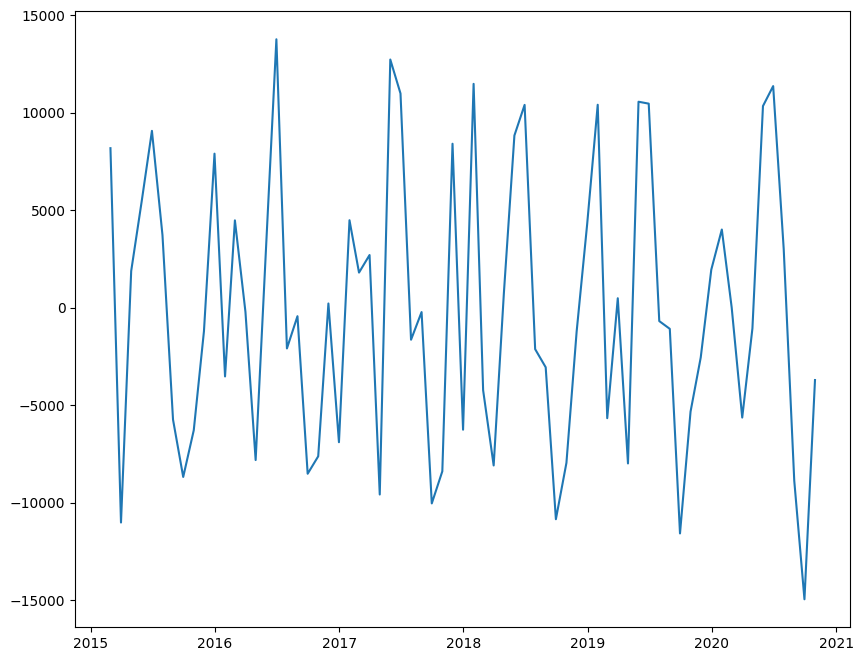

In [ ]:
#Find the first order differencing. 
plt.plot(df_monthly['demand'].diff())

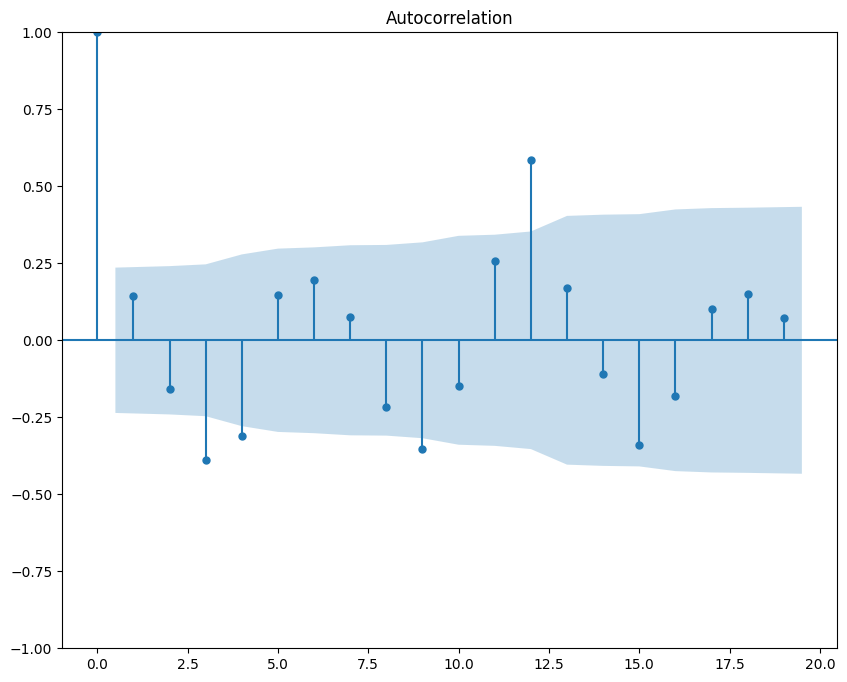

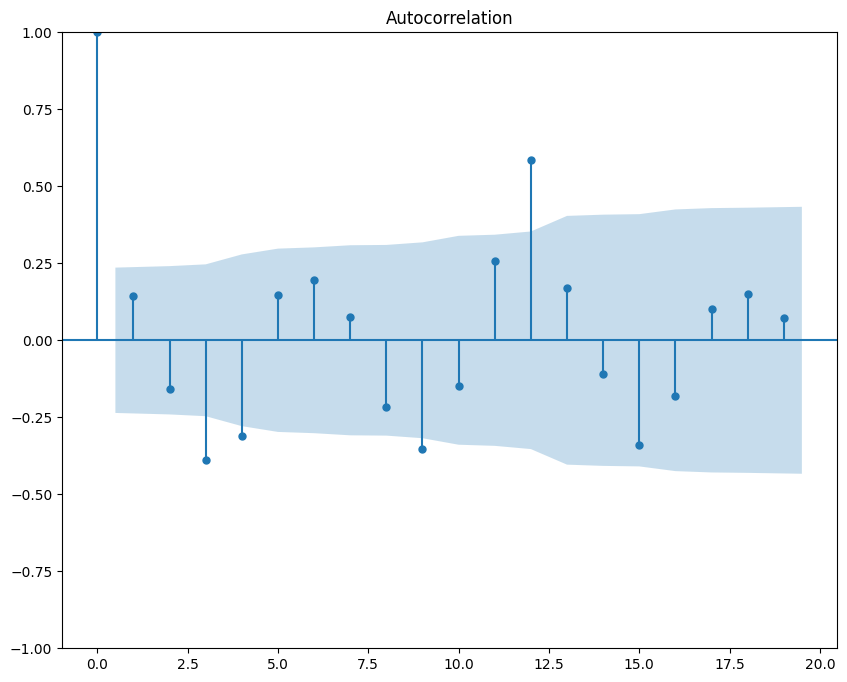

In [ ]:
plot_acf(df_monthly['demand'].diff().dropna())

In [ ]:
result_difference1 = adfuller(df_monthly['demand'].diff().dropna())
result_difference1[1]

# d= 1

0.0021887314373909613

Find value of p, from the ACF-PACF plot. difference between lag and series. 

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



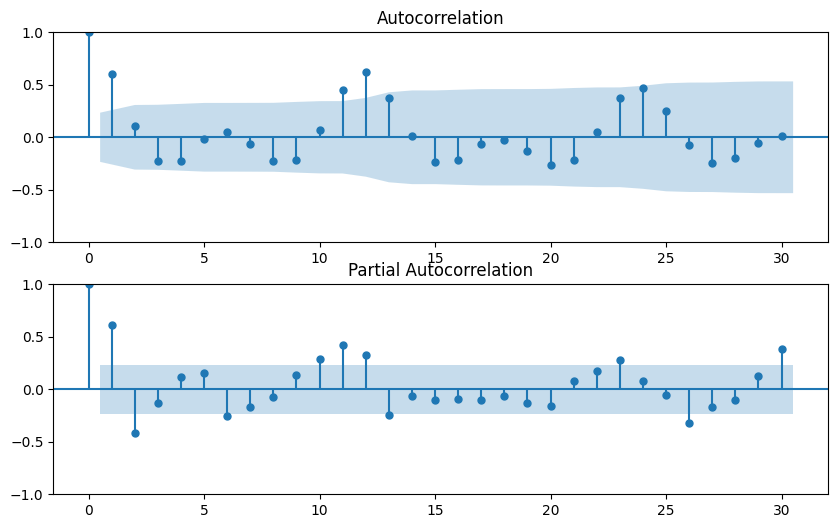

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(10,6))
plot_acf(df_monthly['demand'], lags=30, ax=ax[0])
plot_pacf(df_monthly['demand'], lags=30, ax=ax[1])
plt.show()
#p = 3

Find value of q, from the ACF-PACF plot. difference between lag and series. 

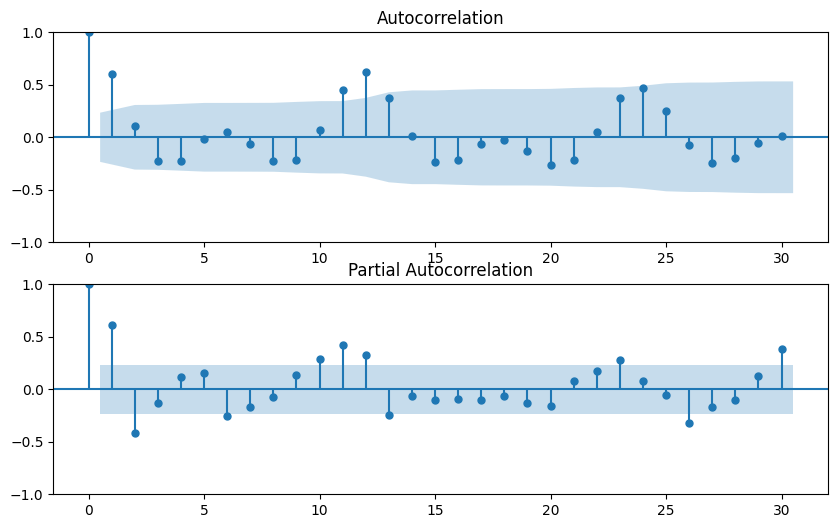

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(10,6))
plot_acf(df_monthly['demand'], lags=30, ax=ax[0])
plot_pacf(df_monthly['demand'], lags=30, ax=ax[1])
plt.show()
#q = 1/2/4

In [ ]:
modelArimaNewParam = ARIMA(train['demand'],order = (3,1,4), freq='M')

In [ ]:
arimaPred_newparameters = modelArimaNewParam.fit()
#forecast_Arima_dfmonthly = modelArimaNewParam.predict(start = '2020-06-30', end = '2020-10-31',params=newparams)
forecast_Arima_dfmonthly = arimaPred_newparameters.forecast(steps=5)
forecast_Arima_dfmonthlyPD = forecast_Arima_dfmonthly.to_frame(name = 'Prediction' )
forecast_Arima_dfmonthlyPD

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,Prediction
2020-06-30,123351.536481
2020-07-31,124676.761062
2020-08-31,120809.732274
2020-09-30,115916.345760
2020-10-31,114744.894970


In [ ]:
(test['demand'] - forecast_Arima_dfmonthlyPD['Prediction']).divide(test['demand'],fill_value=0)

date
2020-06-30    0.046354
2020-07-31    0.057992
2020-08-31    0.021591
2020-09-30   -0.068202
2020-10-31   -0.094887
Freq: M, dtype: float64

In [ ]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(df_monthly.tail()['demand'], forecast_Arima_dfmonthlyPD['Prediction']))/np.max(forecast_Arima_dfmonthlyPD['Prediction'])

0.057350273702837525

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



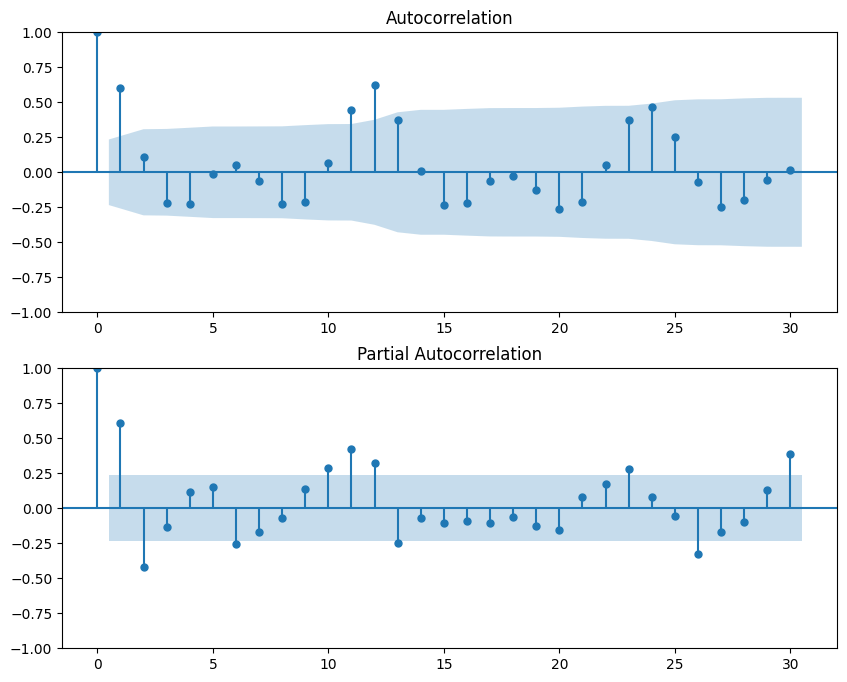

In [ ]:
fig, ax = plt.subplots(2,1)
fig = plot_acf(df_monthly['demand'], lags=30, ax=ax[0])
fig = plot_pacf(df_monthly['demand'], lags=30, ax=ax[1])
plt.show()
#D = 1 = d
#P = 1
#Q = 0
#s =12


In [ ]:
D = 0
result = adfuller(df_monthly['demand'], autolag='AIC')
while result[1] > 0.05:
    D += 1
    df_seasonal_diff = np.diff(df_monthly['demand'], n=D, axis=0)
    result = adfuller(df_seasonal_diff, autolag='AIC')
print(f'D: {D}')

D: 1


In [ ]:
modelSArimaNewParam = SARIMAX(train['demand'], order=(3,1,4), seasonal_order=(1, 1, 0, 12))


In [ ]:

results = modelSArimaNewParam.fit()
forecast_SArima_dfmonthly = results.forecast(steps=5)
forecast_SArima_dfmonthlyPD = forecast_SArima_dfmonthly.to_frame(name = 'Prediction' )
forecast_SArima_dfmonthlyPD

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,Prediction
2020-06-30,124970.257119
2020-07-31,125591.895306
2020-08-31,125578.980192
2020-09-30,110646.374357
2020-10-31,107833.324508


In [ ]:
np.sqrt(metrics.mean_squared_error(test.tail()['demand'], forecast_SArima_dfmonthlyPD['Prediction']))/np.max(forecast_SArima_dfmonthlyPD['Prediction'])

0.032444993967636275

In [ ]:
(test['demand'] - forecast_SArima_dfmonthlyPD['Prediction']).divide(test['demand'],fill_value=0)

date
2020-06-30    0.033840
2020-07-31    0.051077
2020-08-31   -0.017034
2020-09-30   -0.019638
2020-10-31   -0.028938
Freq: M, dtype: float64